In [ ]:
import os
from google.colab import drive
drive.mount('drive')


Mounted at drive


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import np_utils
import pandas as pd
from keras.layers import Input, Dense, Dropout,Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Activation
from keras.models import Model, Sequential
from keras import metrics
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

In [ ]:
os.chdir("drive/My Drive/kaggle/DigitRecognizer/")
!ls

digit-recognizer.zip  sample_submission.csv  test.csv  train.csv


In [ ]:
data_source = './'
filename= 'test.csv'
filepath= os.path.join(data_source, filename)
test= pd.read_csv(filepath)
filename= 'train.csv'
filepath= os.path.join(data_source, filename)
X= pd.read_csv(filepath)

y = X["label"]
X.drop(["label"], inplace = True, axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2 , random_state=42)
X_train = X_train.reshape(X_train.shape[0], 28, 28 , 1).astype('float32')/255.
X_test = X_test.reshape(X_test.shape[0], 28, 28 , 1).astype('float32')/255.
y_train = np_utils.to_categorical(y_train).astype('int32')
y_test = np_utils.to_categorical(y_test)
print(y_test.shape)
print(y_train.shape)
print(X_test.shape)

from keras.layers import Dropout

model = Sequential()

model.add(Conv2D(100, kernel_size=3, padding="valid", input_shape=(28, 28, 1), activation = 'relu'))
model.add(Conv2D(100, kernel_size=3, padding="valid", activation = 'relu'))
model.add(Conv2D(100, kernel_size=3, padding="valid", activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))
model.add(Flatten())
model.add(Dense(units= 500, activation='relu'  ))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation("softmax"))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)
print(y_train.shape)
print(X_test.shape)

es = EarlyStopping(monitor='val_loss', min_delta=0, patience=30, verbose=0, mode='min')

datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=10,
    fill_mode='nearest',
    validation_split = 0.2
    )

datagen.fit(X_train)

train_generator = datagen.flow(X_train, y_train, batch_size=60, subset='training')

validation_generator = datagen.flow(X_train, y_train, batch_size=60, subset='validation')


# fits the model on batches with real-time data augmentation:
h = model.fit_generator(generator=train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch = len(train_generator) / 60,
                    validation_steps = len(validation_generator) / 60,
                    epochs = 300,
                    workers=-1)#, callbacks=es)

(8400, 10)
(33600, 10)
(8400, 28, 28, 1)
(33600, 10)
(8400, 28, 28, 1)
Epoch 1/300
8/7 [================================] - 8s 966ms/step - loss: 2.3847 - acc: 0.3271 - val_loss: 1.2755 - val_acc: 0.6500
Epoch 2/300
8/7 [================================] - 7s 906ms/step - loss: 0.9741 - acc: 0.7125 - val_loss: 0.4425 - val_acc: 0.8417
Epoch 3/300
8/7 [================================] - 7s 923ms/step - loss: 0.5012 - acc: 0.8333 - val_loss: 0.4132 - val_acc: 0.8250
Epoch 4/300
8/7 [================================] - 7s 906ms/step - loss: 0.2708 - acc: 0.9271 - val_loss: 0.2075 - val_acc: 0.9500
Epoch 5/300
8/7 [================================] - 7s 906ms/step - loss: 0.3136 - acc: 0.9042 - val_loss: 0.1879 - val_acc: 0.9417
Epoch 6/300
8/7 [================================] - 7s 907ms/step - loss: 0.2916 - acc: 0.9083 - val_loss: 0.1428 - val_acc: 0.9667
Epoch 7/300
8/7 [================================] - 7s 901ms/step - loss: 0.2590 - acc: 0.9187 - val_loss: 0.2108 - val_acc: 0.925

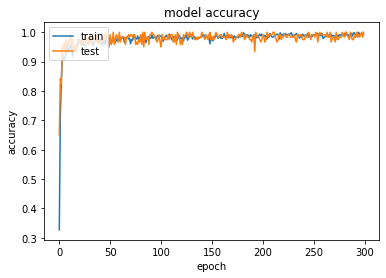

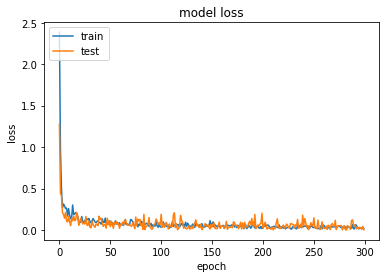

In [ ]:
def plot_learning_curves(history):
    #print history.history.keys()
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
plot_learning_curves(h)

In [ ]:
score = model.evaluate(X_test, y_test)
print (score)

263/263 [==============================] - 34s 128ms/step - loss: 0.1194 - acc: 0.9882
[0.11944358050823212, 0.9882143139839172]


In [ ]:
test_set = (test.values).reshape(-1, 28, 28 , 1).astype('float32')

res = model.predict(test_set)
res = np.argmax(res,axis = 1)
res = pd.Series(res, name="Label")
submission = pd.concat([pd.Series(range(1 ,28001) ,name = "ImageId"),   res],axis = 1)
submission.to_csv("cnn_mnist_datagen.csv",index=False)
submission.head(10)
#print(submission)


,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
5,6,7
6,7,0
7,8,3
8,9,0
9,10,3
